<a href="https://colab.research.google.com/github/Devheun/Data-Analysis/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>데이터 분석 프로젝트</h2>


> 한국인의 삶을 파악하라 !



<h4>'한국복지패널 데이터' 분석 준비하기</h4>

---



In [63]:
pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

raw_welfare=pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
welfare=raw_welfare.copy() # 복구할 상황 대비해 복사본
welfare=welfare.rename( # 변수명 알아보기 쉽게 변경
    columns={
        'h14_g3':'sex',
        'h14_g4':'birth',
        'h14_g10':'marriage_type',
        'h14_g11':'religion',
        'p1402_8aq1':'income',
        'h14_eco9':'code_job',
        'h14_reg7':'code_region'
    }
)

분석마다 두 단계로 진행 ->
1. 변수 검토 및 전처리
2. 변수 간 관계 분석

<h4>성별에 따른 월급 차이</h4>

---



In [ ]:
# 1. 변수 검토하기
welfare['sex'].dtype, welfare['sex'].value_counts()

(dtype('float64'), 2.0    7913
 1.0    6505
 Name: sex, dtype: int64)

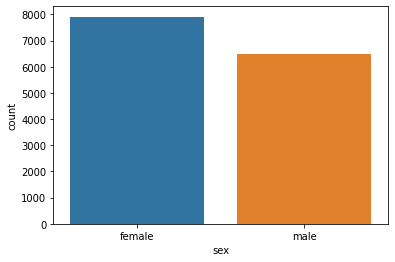

In [ ]:
# 2. 전처리하기
# 이상치가 없으므로 이상치 결측 처리 pass

welfare['sex']=np.where(welfare['sex']==1.0,'male','female') # 값의 의미를 쉽게 이해하도록
sns.countplot(data=welfare,x='sex')

In [ ]:
# 같은 절차로 월급 변수를 전처리

# 1. 변수 검토하기
welfare['income'].dtype, welfare['income'].describe() # 연속 변수는 describe()로 요약 통계량 확인
# income의 최댓값이 1892이므로 '모름/무응답'이면 9999이니까 이상치는 없다.

(dtype('float64'), count    4534.000000
 mean      268.455007
 std       198.021206
 min         0.000000
 25%       150.000000
 50%       220.000000
 75%       345.750000
 max      1892.000000
 Name: income, dtype: float64)

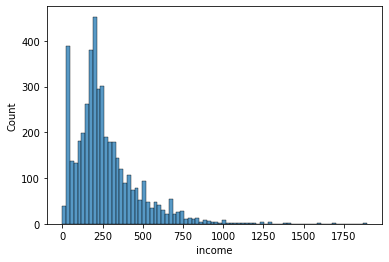

In [ ]:
sns.histplot(data=welfare,x='income')

In [ ]:
# 2. 전처리하기
welfare['income'].isna().sum() # 직업이 없어서 월급 안 받는 사람 있으므로 결측치 제거해야함

9884

<성별에 따른 월급 차이 분석하기>

In [ ]:
# income 결측치 제거 -> sex별 분리 -> income 평균 구하기
sex_income=welfare.dropna(subset=['income'])\
                  .groupby('sex',as_index=False)\
                  .agg(mean_income=('income','mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


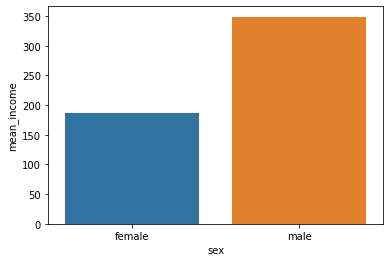

In [ ]:
sns.barplot(data=sex_income,x='sex',y='mean_income')

<h4>나이와 월급의 관계</h4>

---

분석마다 두 단계로 진행 ->
1. 변수 검토 및 전처리
2. 변수 간 관계 분석

<나이 변수 검토 및 전처리하기>

In [ ]:
# 1. 변수 검토하기
welfare['birth'].dtype, welfare['birth'].describe()

(dtype('float64'), count    14418.000000
 mean      1969.280205
 std         24.402250
 min       1907.000000
 25%       1948.000000
 50%       1968.000000
 75%       1990.000000
 max       2018.000000
 Name: birth, dtype: float64)

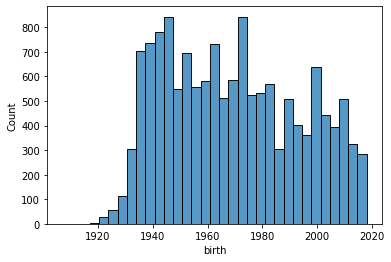

In [ ]:
sns.histplot(data=welfare,x='birth')

In [ ]:
# 2. 전처리하기 - '모름/무응답' 일 경우 9999로
welfare['birth'].isna().sum() # 결측치 없음

0

In [ ]:
# 태어난 년도만 있으니 나이로 바꾸는 파생변수 만들기
welfare=welfare.assign(age=2019-welfare['birth']+1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

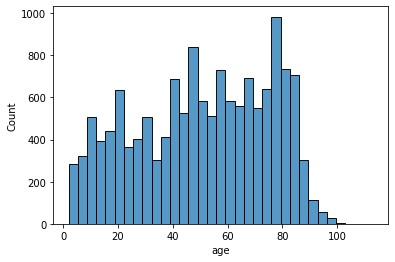

In [ ]:
sns.histplot(data=welfare,x='age')

<나이와 월급의 관계 분석하기>

In [ ]:
age_income=welfare.dropna(subset=['income'])\
                  .groupby('age')\
                  .agg(mean_income=('income','mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


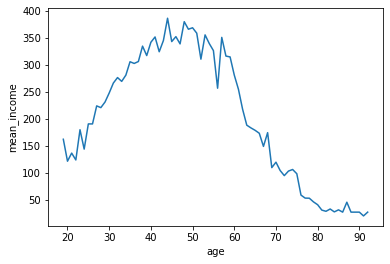

In [ ]:
sns.lineplot(data=age_income,x='age',y='mean_income')

<h4>연령대에 따른 월급 차이</h4>


---

<연령대 변수 검토 및 전처리하기>

In [ ]:
# '연령대' 파생변수 만들기
welfare=welfare.assign(ageg=np.where(welfare['age']<30,'young',
                                     np.where(welfare['age']<=59,'middle','old')))
welfare['ageg'].value_counts()

old       5955
middle    4963
young     3500
Name: ageg, dtype: int64

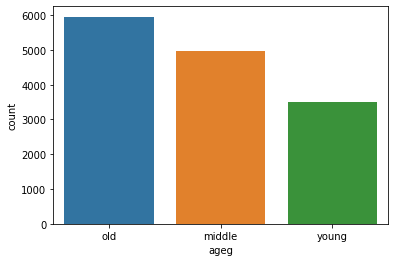

In [ ]:
sns.countplot(data=welfare,x='ageg')

<연령대에 따른 월급 차이 분석하기>

In [ ]:
# 연령대별 월급 평균표 만들기
ageg_income=welfare.dropna(subset=['income'])\
                   .groupby('ageg',as_index=False)\
                   .agg(mean_income=('income','mean'))
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


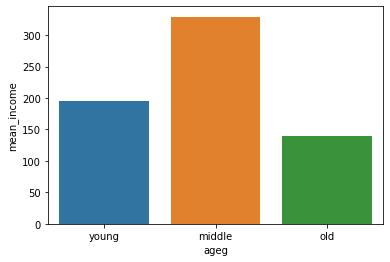

In [ ]:
# 그래프 만들기
sns.barplot(data=ageg_income,x='ageg',y='mean_income',order=['young','middle','old'])

<h4>연령대 및 성별 월급 차이</h4>

---

<연령대 및 성별 월급 차이 분석하기>

In [ ]:
# 연령대 및 성별 월급 평균표 만들기
sex_income=welfare.dropna(subset=['income'])\
                  .groupby(['ageg','sex'],as_index=False)\
                  .agg(mean_income=('income','mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


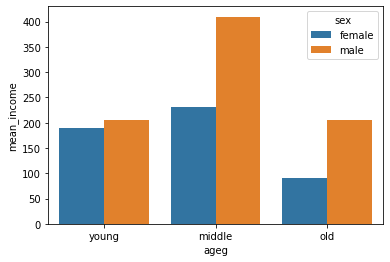

In [ ]:
# 그래프 만들기
sns.barplot(data=sex_income,x='ageg',y='mean_income',hue='sex',order=['young','middle','old'])

<나이 및 성별 월급 차이 분석하기>

In [ ]:
sex_age=welfare.dropna(subset=['income'])\
               .groupby(['age','sex'],as_index=False)\
               .agg(mean_income=('income','mean'))
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


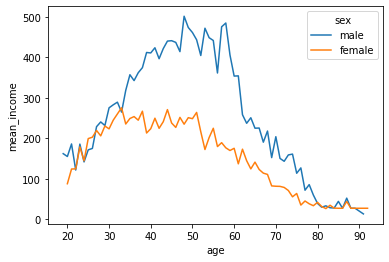

In [ ]:
sns.lineplot(data=sex_age,x='age',y='mean_income',hue='sex')

<h4>직업별 월급 차이</h4>

---

<직업 변수 검토 및 전처리하기>

In [ ]:
# 변수 검토하기
welfare['code_job'].dtypes, welfare['code_job'].value_counts()

(dtype('float64'), 611.0    962
 941.0    391
 521.0    354
 312.0    275
 873.0    236
         ... 
 112.0      2
 784.0      2
 423.0      1
 861.0      1
 872.0      1
 Name: code_job, Length: 150, dtype: int64)

In [ ]:
# 전처리하기
list_job=pd.read_excel('Koweps_Codebook_2019.xlsx',sheet_name='직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [ ]:
list_job.shape

(156, 2)

In [ ]:
# welfare에 list_job 결합하기
welfare=welfare.merge(list_job,how='left',on='code_job') # welfare와 list_job에 공통 변수 code_job

In [ ]:
welfare.dropna(subset=['code_job'])[['code_job','job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


<직업별 월급 차이 분석하기>

In [ ]:
# 직업별 월급 평균표 만들기
job_income=welfare.dropna(subset=['job','income'])\
                  .groupby('job',as_index=False)\
                  .agg(mean_income=('income','mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [ ]:
# 그래프 만들기
# (1) 월급이 많은 직업
top10=job_income.sort_values('mean_income',ascending=False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [ ]:
# 한글로 된 직업 이름이 그래프에 잘 출력되도록 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Malgun Gothic'})
sns.barplot(data=top10,y='job',x='mean_income') # 직업 이름이 길기때문에 y축에 지정

<h4>성별 직업 빈도</h4>


---

<성별 직업 빈도 분석하기>

In [ ]:
# 성별 직업 빈도표 만들기 
job_male=welfare.dropna(subset=['job'])\
                .query('sex=="male"')\
                .groupby('job',as_index=False)\
                .agg(n=('job','count'))\
                .sort_values('n',ascending=False)\
                .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [ ]:
job_female=welfare.dropna(subset=['job'])\
                  .query('sex=="female"')\
                  .groupby('job',as_index=False)\
                  .agg(n=('job','count'))\
                  .sort_values('n',ascending=False)\
                  .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


In [ ]:
# 그래프 만들기
sns.barplot(data=job_male,y='job',x='n').set(xlim=(0,500))

In [ ]:
sns.barplot(data=job_female, y='job',x='n').set(xlim=(0,500))

<h4>종교 유무에 따른 이혼율</h4>

---

<종교 변수 검토 및 전처리하기>

In [66]:
# 1.변수 검토하기
welfare['religion'].dtypes, welfare['religion'].value_counts()

(dtype('float64'), 2.0    7815
 1.0    6603
 Name: religion, dtype: int64)

In [67]:
# 2. 전처리하기
# 1과 2 외에 다른 값 없으므로 이상치 결측 처리 안해도 됨
welfare['religion']=np.where(welfare['religion']==1,'yes','no')
welfare['religion'].value_counts()

no     7815
yes    6603
Name: religion, dtype: int64

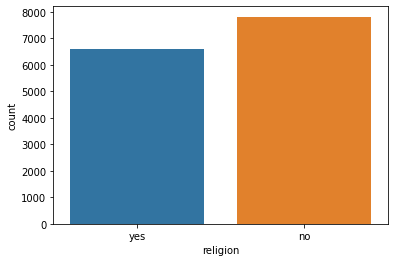

In [ ]:
sns.countplot(data=welfare,x='religion')

<혼인 상태 변수 검토 및 전처리하기>

In [68]:
# 1. 변수 검토하기
welfare['marriage_type'].dtypes, welfare['marriage_type'].value_counts()

(dtype('float64'), 1.0    7190
 5.0    2357
 0.0    2121
 2.0    1954
 3.0     689
 4.0      78
 6.0      29
 Name: marriage_type, dtype: int64)

In [69]:
# 2. 파생변수 만들기 - 이혼 여부
welfare['marriage']=np.where(welfare['marriage_type']==1,'marriage',
                             np.where(welfare['marriage_type']==3,'divorce','etc'))
n_divorce=welfare.groupby('marriage',as_index=False)\
                 .agg(n=('marriage','count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


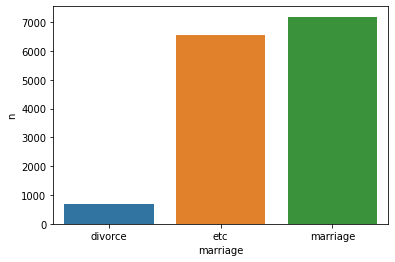

In [ ]:
sns.barplot(data=n_divorce,x='marriage',y='n')